###**04. 데이터 핸들링 - 판다스**


판다스는 파이썬에서 데이터 처리를 위해 존재하는 가장 인기 있는 라이브러리.

2차원 데이터를 효율적으로 가공/처리.

파이썬의 내부데이터뿐만 아니라 다른 파일을 dataframe으로 변경해 데이터의 가공/분석을 수행.

 - Index는 개별 데이터를 고유하게 식별하는 key 값.
 - Series와 Dataframe은 모두 Index를 키값으로 가짐. 하지만 Series와 달리 Dataframe은 칼럼이 여러개인 데이터 구조체.

**[판다스 시작]**

In [1]:
import pandas as pd

1.데이터 파일을 판다스의 Dataframe으로 로딩. (캐글에서 제공하는 데이터 파일을 사용함)
 - read_csv() : csv 파일 포맷 변환을 위한 API.  기본 필드 구분 문자는 콤마. 인자인 sep을 통해 어떤 필드 문자 기반의 파일 포맷도 dataframe으로 변환 가능.
 - read_table() : 기본 필드 구분 문자가 탭(/t).
 - read_fwf() : 고정 길이 기반의 칼럼 포맷을 dataframe으로 로딩하는 API.

2.read_csv 함수에서 가장 중요한 인자는 filepath. 로드하려는 데이터 파일의 경로와 파일명을 입력.

 : pd.read_csv() : 파일명 인자로 들어온 파일을 로딩해 DataFrame 객체로 반환.
 - 별다른 파라미터 지정이 없으면, 파일의 맨 처음 로우를 칼럼명으로 인지.
 - 데이터 값이 로우 순으로 0,1,2...같이 순차적으로 표시 -> 판다스의 Index객체값.


In [2]:
from google.colab import drive

In [3]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 24-1/titanic_train.csv')
print('titanic 변수 type:', type(titanic_df))
titanic_df

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print('Dataframe 크기:', titanic_df.shape)

Dataframe 크기: (891, 12)


3.Dataframe은 칼럼의 타입, Null 데이터 개수, 데이터 분포도등의 메타 데이터도 조회 가능.
 - info() : 총 데이터 건수와 데이터 타입, Null건수를 알 수 있음.
 - describe() : 칼럼별 숫자형 데이터값의 n-percentile분포도, 평균값, 최댓값, 최솟값.

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


-> PassengerID, Survived, Pclass는 카테고리 칼럼을 숫자로 표시한 것.

 - Dataframe['칼럼명'] : series 형태로 데이터 세트가 반환.
 - value_counts() : 해당 칼럼값의 유형과 건수를 확인. 데이터 분포도를 확인하는 데 매우 유용. value_counts메서드는 series 객체에서만 정의도미.

In [7]:
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [8]:
titanic_pclass = titanic_df['Pclass']
print(type(titanic_pclass))

<class 'pandas.core.series.Series'>


In [9]:
titanic_pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

dataframe의 인덱스와 동일한 인덱스

In [10]:
value_counts = titanic_df['Pclass'].value_counts()
print(type(value_counts))
print(value_counts)

<class 'pandas.core.series.Series'>
3    491
1    216
2    184
Name: Pclass, dtype: int64


이처럼 인덱스는 고유성이 보장된다면 의미있는 데이터값 할당이 가능하고, 식별자로 사용할 수 있음.

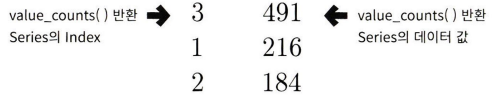

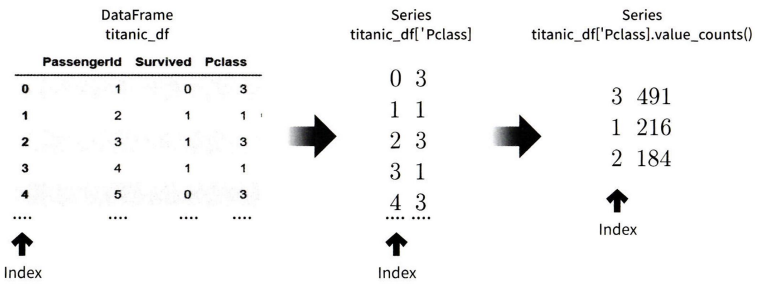

**[DataFrame과 리스트, 딕셔너리, 넘파이 ndarray 상호변환]**

1. 넘파이 ndarray, 리스트, 딕셔너리를 Dataframe으로 변환하기

:Dataframe으로 변환시 칼럼명을 지정해 주어야 함.
 - dataframe의 생성인자 data는 리스트나 딕셔너리 또는 넘파이 ndarray를 입력 받음.
 - 생성인자 colunms는 칼럼명 리스트를 입력받음


<1차원 형태의 리스트와 넘파이 ndarray를 dataframe으로 변환.>

 : 1차원 형태의 데이터는 칼럼명이 한개만 필요.

In [11]:
import numpy as np

col_name1 = ['col1']
list1 = [1,2,3]
array1= np.array(list1)
print('array1 shape:', array1.shape)

#리스트를 이용해 DataFrame 생성
df_list1 = pd.DataFrame(list1, columns=col_name1)
print('1차원 리스트로 만든 DataFrame:\n', df_list1)
#넘파이 ndarray를 이용해 DataFrame 생성
df_array1 = pd.DataFrame(array1, columns=col_name1)
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)

array1 shape: (3,)
1차원 리스트로 만든 DataFrame:
    col1
0     1
1     2
2     3
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


<2차원 형태의 리스트와 ndarray를 기반으로 DataFrame을 생성>

In [12]:
col_name2=['col1','col2','col3']

#2행3열의 리스트와 ndarray 생성한 뒤 이를 DataFrame으로 변환.
list2 = [[1,2,3],
         [11,12,13]]
array2 = np.array(list2)
print('array2 shape:', array2.shape)

df_list2 = pd.DataFrame(list2, columns = col_name2)
print('2차원 리스트로 만든 DataFrame:\n', df_list2)
df_array2 =pd.DataFrame(array2, columns = col_name2)
print('2차원 ndarray로 만든 DataFrame:\n', df_array2)

array2 shape: (2, 3)
2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13
2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


<딕셔너리를 DataFrame으로 변환>

 : 딕셔너리의 키는 칼럼명으로, 딕셔너리의 값은 키에 해당하는 칼럼 데이터로 변환.

 : 키(key)의 경우는 문자열, 값(value)의 경우 리스트나 ndarray 형태로 딕셔너리를 구성.

In [13]:
dict = {'col1':[1,11], 'col2':[2,22], 'col3':[3,33]}
df_dict = pd.DataFrame(dict)
print('딕셔너리로 만든 DataFrame:\n', df_dict)

딕셔너리로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33


2. DataFrame을 넘파이 ndarray,리스트, 딕셔너리로 변환하기

 : 많은 머신러닝 패키지가 기본 데이터 형으로 넘파이 ndarray를 사용

    -> 데이터 핸들링은 DataFrame을 이용하고, 넘파이로 변환하는 경우가 빈번하게 발생.
    
     values를 이용한 ndarray로의 변환이 매우 많이 사용됨.


In [14]:
array3 = df_dict.values
print('df_dict.values 타임:', type(array3), 'df_dict.values shape:', array3.shape)
print(array3)

df_dict.values 타임: <class 'numpy.ndarray'> df_dict.values shape: (2, 3)
[[ 1  2  3]
 [11 22 33]]


  - DataFrame을 리스트로의 변환은 values로 얻은 ndarray에 tolist()를 호출하면 됨.
  - DataFrame의 딕셔너리로의 변환은 객체의 to_dict() 메서드를 호출하는데, 인자를 'list'로 입력해야 함.

In [15]:
list3 = df_dict.values.tolist()
print('df_dict.values.tolist() 타입:', type(list3))
print(list3)

dict3 = df_dict.to_dict('list')
print('df_dict.to_dict() 타입:', type(dict3))
print(dict3)

df_dict.values.tolist() 타입: <class 'list'>
[[1, 2, 3], [11, 22, 33]]
df_dict.to_dict() 타입: <class 'dict'>
{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}


**[DataFrame의 칼럼데이터 세트 생성과 수정]**

 -Titanic DataFrame에 새로운 칼럼 Age_0을 추가하고 일괄적으로 0을 할당.

In [16]:
titanic_df['Age_0']=0
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


 -기존 칼럼 Series의 데이터를 이용해 새로운 칼럼 Series를 생성.

In [17]:
titanic_df['Age_by_10']= titanic_df['Age']*10
titanic_df['Family_No']=titanic_df['SibSp']+titanic_df['Parch']+1
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0,1


 -DataFrame내의 기존 칼럼 값도 쉽게 일괄적으로 업데이트 가능.

In [18]:
titanic_df['Age_by_10']= titanic_df['Age_by_10']+100
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1


**[DataFrame 데이터 삭제]**

  : drop() 메서드 이용.
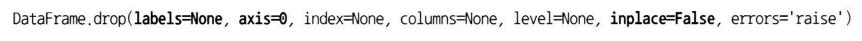

 - 중요한 파라미터 : labels, axis, inplace

  - axis 0은 로우 방향 축으로 특정 로우를 드롭, axis 1은 칼럼 방향 축으로 칼럼을 드롭.
  - labels에 원하는 칼럼/로우 명을 입력. 여러개의 칼럼 삭제시, 리스트 형태로 입력.
  - inplace=False이면 자기 자신의 DataFrame의 데이터는 삭제하지 않음. inplace=True이면 자신의 DataFrame의 데이터를 삭제함. (디폴트 값이 False)

 - axis=1로 설정하고 드롭하는 경우가 많음. axis=0은 이상치 데이터를 삭제하는 경우.

In [19]:
titanic_drop_df = titanic_df.drop('Age_0', axis=1)
titanic_drop_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,360.0,1




---



In [20]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1


In [21]:
drop_result = titanic_df.drop(['Age_0','Age_by_10','Family_No'], axis=1, inplace=True)
print('inplace=True로 drop 후 반환된 값:', drop_result)
titanic_df.head(3)

inplace=True로 drop 후 반환된 값: None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
#axis=0으로 설정해 index 0,1,2 로우를 삭제.
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 15)
print('### before axis 0 drop ###')
print(titanic_df.head(3))

titanic_df.drop([0,1,2], axis=0, inplace=True)
print('### after axis 0 drop ###')
print(titanic_df.head(3))

### before axis 0 drop ###
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch          Ticket     Fare Cabin Embarked
0            1         0       3  Braund, Mr....    male  22.0      1      0       A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mr...  female  38.0      1      0        PC 17599  71.2833   C85        C
2            3         1       3  Heikkinen, ...  female  26.0      0      0  STON/O2. 31...   7.9250   NaN        S
### after axis 0 drop ###
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked
3            4         1       1  Futrelle, M...  female  35.0      1      0  113803  53.1000  C123        S
4            5         0       3  Allen, Mr. ...    male  35.0      0      0  373450   8.0500   NaN        S
5            6         0       3  Moran, Mr. ...    male   NaN      0      0  330877   8.4583   NaN        Q


**[Index 객체]**

 : 판다스의 Index 객체는 Dataframe, Series의 레코드를 고유하게 식별하는 객체.
  - 식별성 데이터를 1차원 array로 가지고 있음.
  - ndarray와 유사하게 단일 값 반환 및 슬라이싱도 가능.

In [23]:
#원본 파일 다시 로딩
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 24-1/titanic_train.csv')

#Index 객체 추출
indexes = titanic_df.index
print(indexes)
print('Index 객체 array값:\n', indexes.values)

RangeIndex(start=0, stop=891, step=1)
Index 객체 array값:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

In [24]:
print(type(indexes.values))
print(indexes.values.shape)
print(indexes[:5].values)
print(indexes.values[:5])
print(indexes[6])

<class 'numpy.ndarray'>
(891,)
[0 1 2 3 4]
[0 1 2 3 4]
6


 - 하지만, 한번 만들어진 DataFrame및 Series의 Index객체는 함부로 변경할 수 없음.

In [25]:
indexes[0]=5

TypeError: Index does not support mutable operations

 - Series객체는 Index객체를 포함하지만, Series객체에 연산 함수를 적용할 때 Index는 연산에서 제외됨.

In [26]:
series_fair = titanic_df['Fare']
print('Fair Series max 값:', series_fair.max())
print('Fair Series sum 값:', series_fair.sum())
print('sum() Fair Series:', sum(series_fair))
print('Fair Series + 3:\n', (series_fair + 3). head(3))

Fair Series max 값: 512.3292
Fair Series sum 값: 28693.9493
sum() Fair Series: 28693.949299999967
Fair Series + 3:
 0    10.2500
1    74.2833
2    10.9250
Name: Fare, dtype: float64


 - Dataframe 및 Series에 reset_index() 메서드를 수행하면 새롭게 인덱스를 연속 숫자형으로 할당, 기존 인덱스는 'index'라는 새로운 칼럼 명으로 추가.

   (인덱스가 연속된 int 숫자형 데이터가 아닐 경우에 주로 사용)

In [27]:
titanic_reset_df = titanic_df.reset_index(inplace=False)
titanic_reset_df.head(3)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S


In [28]:
print('### before reset_index ###')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:', type(value_counts))

new_value_counts = value_counts.reset_index(inplace=False)
print('### after reset_index ###')
print(new_value_counts)
print('new_value_counts 객체 변수 타입:', type(new_value_counts))

### before reset_index ###
3    491
1    216
2    184
Name: Pclass, dtype: int64
value_counts 객체 변수 타입: <class 'pandas.core.series.Series'>
### after reset_index ###
   index  Pclass
0      3     491
1      1     216
2      2     184
new_value_counts 객체 변수 타입: <class 'pandas.core.frame.DataFrame'>


**[데이터 셀렉션 및 필터링]**

 : 판다스의 데이터 셀렉션 필터링은 넘파이와 상당히 유사하면서도 다른 부분도 있음.

  - 넘파이의 경우 '[]'연산자 내 단일 값 추출, 슬라이싱, 팬시 인덱싱, 불린 인덱싱을 통해 데이터 추출.
  - 판다스의 경우 ix[], iloc[], loc[] 연산자를 통해 데이터 추출.


---


1. DataFrame의 [ ] 연산자

 : DataFrame의 '[]'안에 들어갈 수 있는 것은 칼럼 명 문자 또는 인덱스를 변환 가능한 표현식.

   ( 칼럼 지정 연산자)

In [29]:
# 칼럼 데이터의 일부만 추출
print('단일 칼럼 데이터 추출:\n', titanic_df[ 'Pclass' ].head(3))
print('\n여러 칼럼의 데이터 추출:\n', titanic_df[ ['Survived', 'Pclass']].head(3))
print('[ ]안에 숫자 index는 keyError 오류 발생:\n', titanic_df[0])

단일 칼럼 데이터 추출:
 0    3
1    1
2    3
Name: Pclass, dtype: int64

여러 칼럼의 데이터 추출:
    Survived  Pclass
0         0       3
1         1       1
2         1       3


KeyError: 0

- [ ]안에 숫자 값을 입력할 경우, 판다스의 인덱스 형태로 변환 가능한 표현식은 입력 가능.

In [30]:
titanic_df[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C


 - 불린 인덱싱 표현도 가능.

In [31]:
titanic_df[ titanic_df['Pclass'] == 3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.925,NaN,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.050,NaN,S


2. DataFrame ix[ ] 연산자

 : ix[0,'Pclass']와 같이 행 위치, 열 위치 지정을 통해 원하는 위치의 데이터를 추출할 수 있음.
  - 행 위치 지정은 DataFrame의 인덱스 값을 입력해야 함.
  - 열 위치 지정은 칼럼명 뿐만 아니라 칼럼의 위치 값 지정도 가능함.

  =>  행 위치를 두가지 방식으로 제공하면서 코드가 혼돈을 주어 ix[]는 현재 판다스에서 사라지게 됨. => loc[ ],iloc[ ] 사용.

In [32]:
print('칼럼 위치 기반 인덱싱 데이터 추출:', titanic_df.ix[0,2])
print('칼럼 명 기반 인덱싱 데이터 추출:', titanic_df.ix[0,'Pclass'])

AttributeError: 'DataFrame' object has no attribute 'ix'

In [33]:
data = {'Name': ['Chulmin', 'Eunkyung', 'Jinwoong', 'Soobeom'],
        'Year': [2011,2016,2015,2015],
        'Gender': ['Male', 'Female', 'Male', 'Male']
        }
data_df = pd.DataFrame(data, index=['one', 'two', 'three', 'four'])
data_df

,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


3. 명칭 기반 인덱싱과 위치 기반 인덱싱의 구분

 - 명칭(label)기반 인덱싱은 칼럼의 명칭을 기반으로 위치를 지정하는 방식.
 - 위치(position)기반 인덱싱은 행과 열 위치를 기반으로 데이터를 지정하는 방식.


> DataFrame의 인덱스 값은 명칭 기반 인덱싱일까? 위치 기반 인덱싱일까?



In [34]:
#data_df를 reset_index()로 새로운 숫자형 인덱스를 생성
data_df_reset = data_df.reset_index()
data_df_reset = data_df_reset.rename(columns={'index':'old_index'})

#인덱스값에 1을 더해서 1부터 시작하는 새로운 인덱스값 생성
data_df_reset.index = data_df_reset.index+1
data_df_reset

,old_index,Name,Year,Gender
1,one,Chulmin,2011,Male
2,two,Eunkyung,2016,Female
3,three,Jinwoong,2015,Male
4,four,Soobeom,2015,Male


In [35]:
data_df_reset.ix[1,1]

AttributeError: 'DataFrame' object has no attribute 'ix'

=> DataFrame의 인덱스값은 명칭 기반 인덱싱이라고 간주해야 함.

=> 혼선을 초래할 여지가 있기 때문에, 명칭 기반 인덱싱 연산자 loc[ ]와 위치 기반 인덱싱 iloc[ ] 연산자를 도입.

4. DataFrame iloc[ ] 연산자

 :위치 기반 인덱싱만 허용.

 :행과 열 값으로 integer, integer의 슬라이싱, 팬시 리스트 값을 입력해 주어야 함.


In [36]:
data_df.iloc[0,0]

'Chulmin'

In [37]:
#다음 코드는 오류 발생
data_df.iloc[0,'Name']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [38]:
#다음코드는 오류
data_df.iloc['one',0]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [39]:
data_df_reset.iloc[0,1]

'Chulmin'

5. DataFrame loc[ ] 연산자

 : 명칭 기반으로 데이터를 추출.

 : 행 위치에는 DataFrame index 값을, 열 위치에는 칼럼명을 입력해줌.


In [40]:
data_df.loc['one','Name']

'Chulmin'

In [41]:
data_df_reset.loc[1,'Name']

'Chulmin'

In [42]:
data_df_reset.loc[0,'Name']

KeyError: 0



> loc[ ]에 슬라이싱 기호 ':'를 적용할 때 한가지 유의할 점이 있음. loc[]에 슬라이싱 기호를 적용하면 종료값까지 포함. (종료값-1 X)

-> 명칭은 숫자형이 아닐 수 도 있기 때문에 -1을 할 수 없음.



In [44]:
print('명칭 기반 ix silcing\n', data_df.ix['one':'two','Name'], '\n')

AttributeError: 'DataFrame' object has no attribute 'ix'

In [45]:
print('위치 기반 iloc slicing\n', data_df.iloc[0:1, 0], '\n')
print('명칭 기반 loc slicing\n', data_df.loc['one': 'two', 'Name'])

위치 기반 iloc slicing
 one    Chulmin
Name: Name, dtype: object 

명칭 기반 loc slicing
 one     Chulmin
two    Eunkyung
Name: Name, dtype: object


In [46]:
print(data_Df_reset.loc[1:2],'Name')

NameError: name 'data_Df_reset' is not defined

In [47]:
print(data_df.ix[1:2, 'Name'])

AttributeError: 'DataFrame' object has no attribute 'ix'

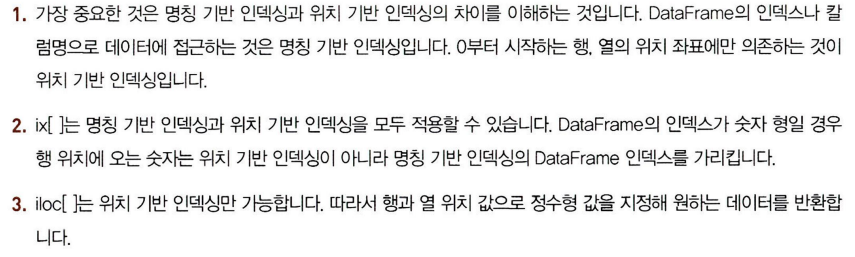

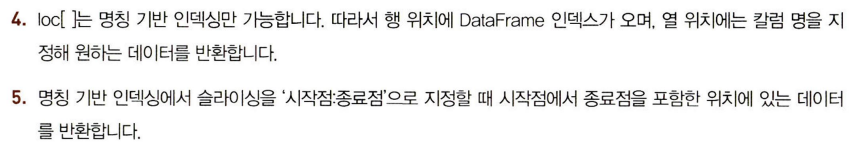

6. 불린 인덱싱

 : 불린 인덱싱은 처음부터 가져올 값을 조건으로 ix[]내에 입력하여 자동으로 원하는 값을 필터링.

 - [ ], ix[ ], loc[ ]에서 공통으로 지원. iloc[ ]는 불린값에 대해 지원하지 않음.

In [49]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 24-1/titanic_train.csv')
titanic_boolean = titanic_df[titanic_df['Age']>60]
print(type(titanic_boolean))
titanic_boolean

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr...",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. ...",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,Goldschmidt...,male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr...",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,Van der hoe...,male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. ...",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. ...",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr...",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr...",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [50]:
# 60세 이상인 승객의 나이와 이름만 추출
titanic_df[titanic_df['Age']>60][['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0


In [51]:
titanic_df.loc[titanic_df['Age']>60,['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0


여러개의 복합 조건도 결합해 적용 가능.

In [52]:
titanic_df[ (titanic_df['Age'] > 60) & (titanic_df['Pclass']==1) &
            (titanic_df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


In [53]:
cond1= titanic_df['Age'] > 60
cond2 = titanic_df['Pclass']==1
cond3 = titanic_df['Sex']=='female'
titanic_df [ cond1 & cond2 & cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


**[정렬, Aggregation 함수, GroupBy 적용]**

1. DataFrame, Series의 정렬 - sort_values()

 : 주요 입력 파라미터는 by, ascending, inplace
 - by로 특정 칼럼을 입력하면 해당 칼럼으로 정렬을 수행.
 - Ascending=True로 설정하면 오름차순. False는 내림차순. (디폴트는 True)
 - inplace=True로 설정하면 호출한 DataFrame의 정렬결과를 그대로 적용. (디폴트는 False)

In [55]:
titanic_sorted = titanic_df.sort_values(by=['Name'])
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr....",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr....",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs...",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [56]:
titanic_sorted = titanic_df.sort_values(by=['Pclass','Name'], ascending=False)
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,van Melkebe...,male,NaN,0,0,345777,9.5,NaN,S
153,154,0,3,van Billiar...,male,40.5,0,2,A/5. 851,14.5,NaN,S
282,283,0,3,de Pelsmaek...,male,16.0,0,0,345778,9.5,NaN,S


2. Aggregation 함수 적용

 : min(), max(), sum(), count()와 같은 함수.
 - DataFrame에서 바로 aggregation을 호출할 경우 모든 칼럼에 해당 aggregation을 적용.

In [57]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

 - 특정 칼럼에 aggregation함수를 적용하기 위해서는 대상 칼럼을 추출해 적용.

In [58]:
titanic_df[['Age','Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

3. groupby() 적용
 - 입력 파라미터 by에 칼럼을 입력하면 대상 칼럼으로 groupby 됨.
 - DataFrame에 groupby()를 호출하면 DataFrameGroupBy라는 다른 형태의 DataFrame을 반환.

In [60]:
titanic_groupby = titanic_df.groupby(by='Pclass')
print(type(titanic_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>




---

SQL의 groupby와 차이점

 - groupby를 호출한 결과에 aggregation함수를 호출하면, groupby 대상 칼럼을 제외한 모든 칼럼에 aggregation함수를 적용.

In [61]:
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [63]:
titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId','Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


 - DataFrame의 groupby의 경우 적용하려는 여러개의 aggregation함수명을 agg()내에 인자로 입력하여 사용함.

In [64]:
titanic_df.groupby('Pclass')['Age'].agg([max,min])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


 - 하지만, 여러개의 칼럼이 서로 다른 aggregation함수를 호출하는 경우 복잡한 처리가 필요. 딕셔너리 형태로 aggregation 함수 입력.

In [65]:
agg_format = {'Age':'max', 'SibSp':'sum', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


**[결손 데이터 처리하기]**
 - 결손 데이터란? 칼럼에 값이 없는, 즉 NULL인 경우를 의미.
 - 기본적으로 머신러닝 알고리즘은 이 값을 처리하지 않으므로 이 값을 다른 값으로 대체해야 함.


1. isna()로 결손 데이터 여부 확인

 : 모든 칼럼의 값이 NaN이 아닌지를 True나 False로 알려줌.


In [66]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [67]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2. fillna()로 결손 데이터 대체하기

 : 결손 데이터를 다른 값으로 대체 가능.
 - 주의) fillna()를 이용해 반환 값을 받거나 inplace=True파라미터를 fillna()에 추가해야 실제 데이터 세트 값이 변경됨.

In [68]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,C000,S


In [69]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('5')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**[apply lambda 식으로 데이터 가공]**

판다스는 apply함수에 lambda 식을 결합해 DataFrame이나 Series의 레코드별로 데이터를 가공하는 기능을 제공.


---

lambda 식이란?

: 함수의 선언과 함수내의 처리를 한 줄의 식으로 쉽게 변환하는 식.

In [70]:
def get_square(a):
    return a**2

print('3의 제곱은:', get_square(3))

3의 제곱은: 9


In [71]:
lambda_square = lambda x : x**2
print('3의 제곱은:', lambda_square(3))

3의 제곱은: 9


여러 개의 값을 입력 인자로 사용해야 할 경우에 map() 함수와 결합.

In [72]:
a=[1,2,3]
squares = map(lambda x : x**2, a)
list(squares)

[1, 4, 9]



---

 : DataFrame의 apply에 lambda 식을 적용해 데이터를 가공.

In [73]:
titanic_df['Name_len']=titanic_df['Name'].apply(lambda x :len(x))
titanic_df[['Name', 'Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr....",23
1,"Cumings, Mr...",51
2,"Heikkinen, ...",22


lambda 식을 if와 사용할때는, if식보다 반환 값을 먼저 기술해야 함.

 if, else만 지원을 하고, ifelse는 지원하지 않음.

In [74]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x <= 15 else 'Adult')
titanic_df[['Age', 'Child_Adult']].head(8)

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child


In [75]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x <= 15 else ('Adult' if x <= 60
                                                                                    else 'Elderly'))
titanic_df['Age_cat'].value_counts()

Adult      786
Child       83
Elderly     22
Name: Age_cat, dtype: int64

In [76]:
#나이에 따라 세분화된 분류를 수행하는 함수 생성
def get_category(age):
  cat = ''
  if age <= 5 : cat = 'Baby'
  elif age <=12 : cat = 'Child'
  elif age <=18 : cat = 'Teenager'
  elif age <=25 : cat = 'Student'
  elif age <=35 : cat = 'Young Adult'
  elif age <=60 : cat = 'Adult'
  else: cat = 'Elderly'

  return cat

#lambda 식에 윙서 생성한 get_category() 함수를 반환값으로 지정
#get _category(X)는 입력값으로 'age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age', 'Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
